# Case Study: Promotion Decision System at NexaCore Solutions

You are a **Data Scientist** at *NexaCore Solutions*, a multinational organization with a geographically distributed workforce and diverse functional units. The company invests heavily in employee training, performance evaluation, and leadership development programs.

Despite a well-defined promotion policy, recent internal audits have uncovered **significant inconsistencies in promotion outcomes** across departments and regions. Senior leadership has raised concerns regarding:
- Unequal promotion probabilities for employees with similar performance profiles  
- Department-level subjectivity and favoritism  
- Lack of transparency in promotion decisions  

To eliminate bias and introduce accountability, the organization has decided to implement a **machine learning–driven promotion recommendation system**.

---

## Problem Statement

Your task is to build a **binary classification system** that predicts:

> **Whether an employee should be promoted (`is_promoted = 1`) or not (`is_promoted = 0`)**

based on historical employee data.

The system will serve as a **decision-support tool** for the HR department and will directly influence promotion recommendations.

---

## Dataset Description

The dataset contains the following attributes:

| Variable | Description |
|--------|-------------|
| employee_id | Unique employee identifier |
| department | Functional department |
| region | Region of employment |
| education | Highest qualification |
| gender | Gender |
| recruitment_channel | Hiring source |
| no_of_trainings | Number of training programs attended |
| age | Age of the employee |
| previous_year_rating | Performance rating in the previous year |
| length_of_service | Total years with the organization |
| awards_won? | Whether any award was received |
| avg_training_score | Average training performance |
| is_promoted | **Target variable** |

---

## Critical Constraint: One-Shot Analysis

This project operates under **strict operational constraints**:

- The entire pipeline runs on **cloud infrastructure**, incurring **significant computation and storage costs**.
- **There is no opportunity to re-run EDA, data preparation, or model training**.
- Any missed insight, anomaly, or data issue **cannot be rectified later**.
- Errors in modeling may lead to **financial loss, reputational damage, and unfair promotion decisions**.

Therefore, **every step—from data preparation to model selection—is mission-critical**.

---

## Exploratory Data Analysis (EDA) — Mandatory and Exhaustive

A **thorough and complete EDA** is expected.

- All **patterns, anomalies, class imbalance issues, relationships, and distributional characteristics** must be identified.
- EDA findings must directly inform **feature handling, preprocessing, and model choice**.
- Missing or ignored insights will propagate errors into downstream models and are considered **analytical negligence**.

---

## Modeling Strategy

Based strictly on insights derived from EDA, you must follow a **structured modeling approach**:

### 1. Single (Baseline) Models
Build and evaluate individual classifiers such as:
- **Logistic Regression**
- **Decision Tree Classifier**

These models will establish baseline performance and interpretability.

---

### 2. Ensemble Models

To improve generalization and robustness, implement and compare the following ensemble techniques:

- **Bagging-based Ensembles**  
  - Focus on variance reduction  
  - Useful when base learners overfit  

- **Boosting-based Ensembles**  
  - Focus on correcting previous errors  
  - Useful for learning complex decision boundaries  

- **Voting-based Ensembles**  
  - Combine heterogeneous models  
  - Useful for balancing bias–variance trade-offs  

Each ensemble must be justified in terms of **why it is suitable for this dataset**.

---

## Model Evaluation and Risk Assessment

Models must be evaluated using:
- Cross-validation performance  
- Stability across folds  
- Train vs validation behavior (overfitting detection)  
- Performance on unseen test data  

A model with high accuracy but poor generalization **cannot be deployed**.

---

## Final Recommendation (Mandatory)

You must **recommend exactly one model for deployment**, supported by:

- Evidence from EDA  
- Comparative performance across single and ensemble models  
- Overfitting and stability analysis  
- Suitability under **high-cost, no-retraining constraints**  

The chosen model must demonstrate:
- Strong generalization  
- Stable cross-validation behavior  
- Minimal risk of failure in production  

---

## Key Principle

> In a real-world, cloud-based system, **accuracy alone is insufficient**.  
> The deployable model must be **robust, stable, and defensible**.

---

Failure to justify any step in the pipeline may result in **biased promotion outcomes and irreversible operational costs**.



In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [40]:
emp = pd.read_csv("HR.csv")
emp.shape
emp.head(50)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [41]:
emp.info()
# Typecasting features to 'category'
emp['department'] = emp['department'].astype('category')
emp['region'] = emp['region'].astype('category')
emp['education'] = emp['education'].astype('category')
emp['gender'] = emp['gender'].astype('category')
emp['recruitment_channel'] = emp['recruitment_channel'].astype('category')
emp['awards_won?'] = emp['awards_won?'].astype('category')
emp['is_promoted'] = emp['is_promoted'].astype('category')
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries,


Missing values AFTER replacing zeros:
 employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


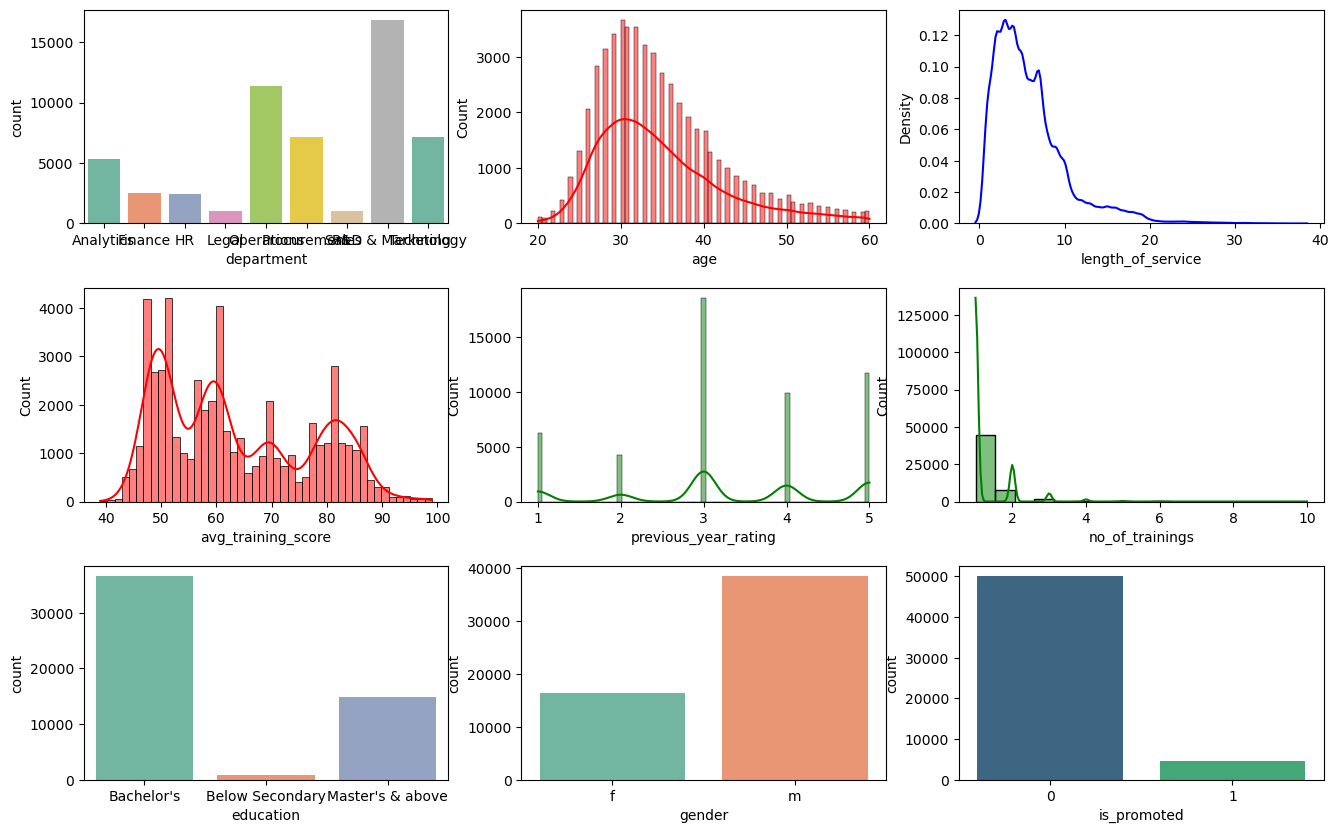

In [42]:
#emp.dtype
print("\nMissing values AFTER replacing zeros:\n", emp.isnull().sum())
#emp['previous_year_rating'] = emp['previous_year_rating'].fillna(0)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(16, 10))

sns.countplot(x='department', data=emp, ax=axes[0, 0], palette='Set2')
sns.histplot(emp['age'], kde=True, ax=axes[0, 1], color='red')
sns.kdeplot(emp['length_of_service'].dropna(), ax=axes[0, 2], color='blue')

sns.histplot(emp['avg_training_score'], kde=True, ax=axes[1, 0], color='red')
sns.histplot(emp['previous_year_rating'], kde=True, ax=axes[1, 1], color='green')
sns.histplot(emp['no_of_trainings'], kde=True, ax=axes[1, 2], color='green')

sns.countplot(x='education', data=emp, ax=axes[2, 0], palette='Set2')
sns.countplot(x='gender', data=emp, ax=axes[2, 1], palette='Set2')
sns.countplot(x='is_promoted', data=emp, ax=axes[2, 2], palette='viridis')

plt.subplots_adjust(hspace=0.3)
# plt.tight_layout()
plt.show()

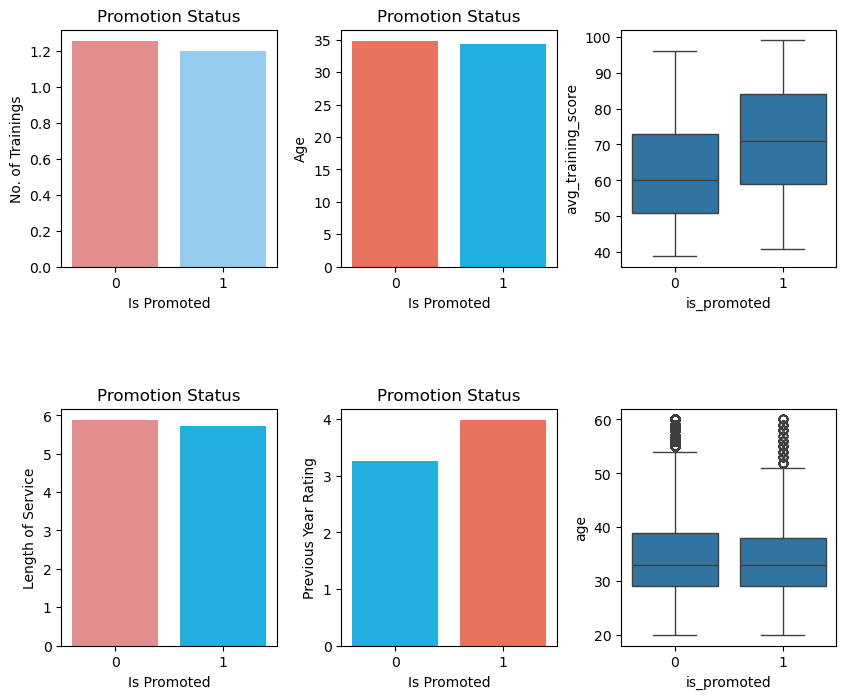

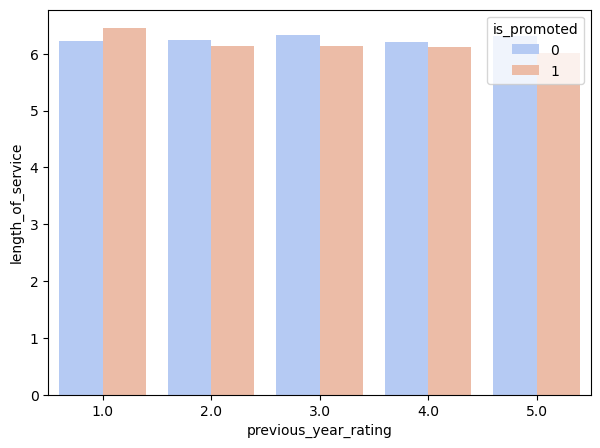

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))  

# Plot 1
sns.barplot(x='is_promoted', y='no_of_trainings', data=emp, palette=['lightcoral', 'lightskyblue'], ci=None, ax=axes[0, 0])
axes[0, 0].set_title("Promotion Status")
axes[0, 0].set_xlabel("Is Promoted")
axes[0, 0].set_ylabel("No. of Trainings")

# Plot 2
sns.barplot(x='is_promoted',y='age',data=emp,palette=['tomato', 'deepskyblue'],ci=None, ax=axes[0, 1])
axes[0, 1].set_title("Promotion Status")
axes[0, 1].set_xlabel("Is Promoted")
axes[0, 1].set_ylabel("Age")

# Plot 3
sns.boxplot(x='is_promoted', y='avg_training_score', data=emp, ax=axes[0, 2])

# Plot 4
sns.barplot(x='is_promoted',y='length_of_service', data=emp, palette=['lightcoral', 'deepskyblue'], ci=None, ax=axes[1, 0])
axes[1, 0].set_title("Promotion Status")
axes[1, 0].set_xlabel("Is Promoted")
axes[1, 0].set_ylabel("Length of Service")

# Plot 5
sns.barplot(x='is_promoted', y='previous_year_rating', data=emp, palette=['deepskyblue', 'tomato'], ci=None, ax=axes[1, 1])
axes[1, 1].set_title("Promotion Status")
axes[1, 1].set_xlabel("Is Promoted")
axes[1, 1].set_ylabel("Previous Year Rating")

# Plot 6
sns.boxplot(x='is_promoted', y='age', data=emp, ax=axes[1, 2]
)

plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(x='previous_year_rating',y='length_of_service', hue= 'is_promoted', data=emp, palette='coolwarm',ci=None)
plt.show() 


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

X = emp.drop(['employee_id','is_promoted'], axis=1)
y = emp['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#segregating cat and num columns

cat_features = ['department',
    'region',
    'education',
    'gender',
    'previous_year_rating',            
    'recruitment_channel',
    'awards_won?']   # categorical cols

num_features = ['age',   
    'no_of_trainings',
    'length_of_service',
    'avg_training_score']   # numeric cols

mode_Reason = X_train['education'].dropna().mode()[0]
X_train['education'].fillna(mode_Reason, inplace=True)
X_test['education'].fillna(mode_Reason, inplace=True)

X_train['previous_year_rating'] = X_train['previous_year_rating'].fillna(0)
X_test['previous_year_rating'] = X_test['previous_year_rating'].fillna(0)

#print("\nMissing values AFTER replacing zeros:\n", X_train.isnull().sum())
#print(X_train.head(50))
'''
#One Hot Encoding
X_train = pd.get_dummies(X_train, columns=cat_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_features, drop_first=True)

#Scaling
#scaler = StandardScaler()
scaler = MinMaxScaler()
features_to_scale = num_features

# Fit the scaler on training data and transform
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Transform the test data using the same scaler
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])
'''
print(X_train.head(50))
print(X_train.shape)

              department     region         education gender  \
3872   Sales & Marketing  region_19        Bachelor's      m   
11619         Technology  region_13  Master's & above      m   
36178         Technology  region_22        Bachelor's      m   
29884  Sales & Marketing   region_2  Master's & above      m   
22968                R&D   region_7        Bachelor's      m   
23994         Operations  region_26        Bachelor's      f   
14240  Sales & Marketing   region_2  Master's & above      m   
40790            Finance   region_2        Bachelor's      m   
3008             Finance   region_3        Bachelor's      m   
31378  Sales & Marketing  region_26        Bachelor's      m   
14533        Procurement  region_23        Bachelor's      m   
45237         Technology   region_4  Master's & above      f   
24006  Sales & Marketing   region_2        Bachelor's      m   
8053          Technology  region_28        Bachelor's      m   
28738         Operations   region_4  Mas

In [45]:
#logistic regression

lg_pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ])),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

lg_pipeline.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lg_pipeline.score(X_test, y_test)))
y_pred_train = lg_pipeline.predict(X_train)
results = confusion_matrix(y_train, y_pred_train)
print ("Confusion Matrix of train set")
print(results)
rep = classification_report(y_train, y_pred_train) 
print ("Report of train data")
print(rep)

y_pred_test = lg_pipeline.predict(X_test)
results = confusion_matrix(y_test, y_pred_test)
print ("Confusion Matrix of test set")
print(results)
rep = classification_report(y_test, y_pred_test) 
print ("Report of test data")
print(rep)


Accuracy of Logistic regression classifier on test set: 0.94
Confusion Matrix of train set
[[40044    42]
 [ 2777   983]]
Report of train data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     40086
           1       0.96      0.26      0.41      3760

    accuracy                           0.94     43846
   macro avg       0.95      0.63      0.69     43846
weighted avg       0.94      0.94      0.92     43846

Confusion Matrix of test set
[[10039    15]
 [  682   226]]
Report of test data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.94      0.25      0.39       908

    accuracy                           0.94     10962
   macro avg       0.94      0.62      0.68     10962
weighted avg       0.94      0.94      0.92     10962



In [46]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

print('Shape of train data', X_train.shape)
print('Shape of train data', y_train.shape)

#show class balance BEFORE SMOTE
print("Before SMOTE:", Counter(y_train))

# pipeline
lg_pipeline_smote = Pipeline([
    ('preprocess', ColumnTransformer([
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ])),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit pipeline
lg_pipeline_smote.fit(X_train, y_train)

# Predictions
y_pred_train = lg_pipeline_smote.predict(X_train)
y_pred_test  = lg_pipeline_smote.predict(X_test)

# Evaluation
print("\nTrain Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Shape of train data (43846, 11)
Shape of train data (43846,)
Before SMOTE: Counter({0: 40086, 1: 3760})

Train Confusion Matrix:
 [[30924  9162]
 [ 1244  2516]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     40086
           1       0.22      0.67      0.33      3760

    accuracy                           0.76     43846
   macro avg       0.59      0.72      0.59     43846
weighted avg       0.90      0.76      0.81     43846


Test Confusion Matrix:
 [[7721 2333]
 [ 301  607]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     10054
           1       0.21      0.67      0.32       908

    accuracy                           0.76     10962
   macro avg       0.58      0.72      0.58     10962
weighted avg       0.90      0.76      0.81     10962



In [52]:
X_train_dt=X_train.copy()
y_train_dt=y_train.copy()
X_test_dt=X_test.copy()
y_test_dt=y_test.copy()
print(X_train_dt.shape)
print(X_test_dt.shape)
#print(X_train_dt.head(50))

le = LabelEncoder()
for c in cat_features:    
    X_train_dt[c]=le.fit_transform(X_train_dt[c])
    X_test_dt[c]=le.transform(X_test_dt[c])

print(X_train_dt.head(50))

(43846, 11)
(10962, 11)
       department  region  education  gender  recruitment_channel  \
3872            7      10          0       1                    0   
11619           8       4          2       1                    2   
36178           8      14          0       1                    0   
29884           7      11          2       1                    0   
22968           6      31          0       1                    2   
23994           4      18          0       0                    2   
14240           7      11          2       1                    0   
40790           1      11          0       1                    0   
3008            1      22          0       1                    0   
31378           7      18          0       1                    0   
14533           5      15          0       1                    2   
45237           8      28          2       0                    0   
24006           7      11          0       1                    2   
8053      

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

smote = SMOTE()
X_train_smote_dt, y_train_smote_dt = smote.fit_resample(X_train_dt,y_train_dt)

dt_gini = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

dt_gini.fit(X_train_smote_dt, y_train_smote_dt)
y_train_pred_gini=dt_gini.predict(X_train_smote_dt)
y_test_pred_gini = dt_gini.predict(X_test_dt)

print("\n--- Train Results ---")
print("Gini Train Accuracy",accuracy_score(y_train_smote_dt, y_train_pred_gini))
print("Gini Train Confusion Matrix:\n", confusion_matrix(y_train_smote_dt, y_train_pred_gini))
print(classification_report(y_train_smote_dt, y_train_pred_gini))

print("\n--- Test Results ---")
print("Gini Test Accuracy",accuracy_score(y_test_dt, y_test_pred_gini))
print("Gini Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_gini))
print(classification_report(y_test, y_test_pred_gini))


#entropy
dt_ent = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dt_ent.fit(X_train_smote_dt, y_train_smote_dt)
y_train_pred_ent=dt_ent.predict(X_train_smote_dt)
y_pred_entropy = dt_ent.predict(X_test_dt)
y_test_pred_ent = dt_ent.predict(X_test_dt)

print("\n--- Train Results ---")
print("Ent Train Accuracy",accuracy_score(y_train_smote_dt, y_train_pred_ent))
print("Ent Train Confusion Matrix:\n", confusion_matrix(y_train_smote_dt, y_train_pred_ent))
print(classification_report(y_train_smote_dt, y_train_pred_ent))

print("\n--- Test Results ---")
print("Ent Test Accuracy",accuracy_score(y_test_dt, y_test_pred_ent))
print("Ent Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_ent))
print(classification_report(y_test, y_test_pred_ent))


--- Train Results ---
Gini Train Accuracy 0.998303647158609
Gini Train Confusion Matrix:
 [[40017    69]
 [   67 40019]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00     40086

    accuracy                           1.00     80172
   macro avg       1.00      1.00      1.00     80172
weighted avg       1.00      1.00      1.00     80172


--- Test Results ---
Gini Test Accuracy 0.8206531654807517
Gini Test Confusion Matrix:
 [[8616 1438]
 [ 528  380]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10054
           1       0.21      0.42      0.28       908

    accuracy                           0.82     10962
   macro avg       0.58      0.64      0.59     10962
weighted avg       0.88      0.82      0.85     10962


--- Train Results ---
Ent Train Accuracy 0.998303647158609
Ent Train Confusion Matrix:
 [[40017    69]
 [  

In [54]:
print(X_train_dt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43846 entries, 3872 to 15795
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   department            43846 non-null  int64
 1   region                43846 non-null  int64
 2   education             43846 non-null  int64
 3   gender                43846 non-null  int64
 4   recruitment_channel   43846 non-null  int64
 5   no_of_trainings       43846 non-null  int64
 6   age                   43846 non-null  int64
 7   previous_year_rating  43846 non-null  int64
 8   length_of_service     43846 non-null  int64
 9   awards_won?           43846 non-null  int64
 10  avg_training_score    43846 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB
None



--- Bagging Classifier ---
Train Accuracy: 0.9981789153320362
Test Accuracy : 0.8776683087027914
OOB Score     : 0.9339544978296662


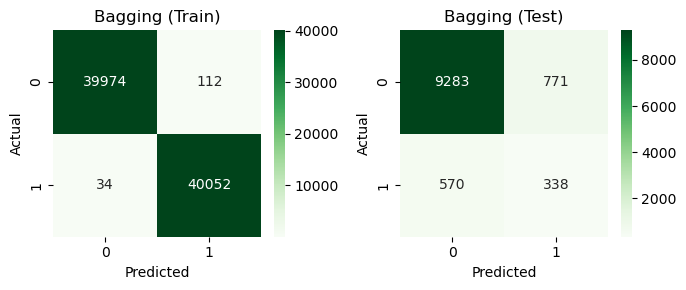

In [65]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# BAGGING CLASSIFIER
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=50,
    random_state=10,
    oob_score=True
)

bag.fit(X_train_smote_dt, y_train_smote_dt)

# Predictions
y_pred_train_bag = bag.predict(X_train_smote_dt)
y_pred_test_bag  = bag.predict(X_test_dt)

# Accuracy & OOB
print("\n--- Bagging Classifier ---")
print("Train Accuracy:", accuracy_score(y_train_smote_dt, y_pred_train_bag))
print("Test Accuracy :", accuracy_score(y_test_dt, y_pred_test_bag))
print("OOB Score     :", bag.oob_score_)

# Confusion Matrices (Train vs Test)
fig, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(confusion_matrix(y_train_smote_dt, y_pred_train_bag), annot=True, fmt="d", cmap="Greens", ax=axes[0])
axes[0].set_title("Bagging (Train)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_dt, y_pred_test_bag), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Bagging (Test)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


--- AdaBoost Classifier ---
Train Accuracy: 0.707553759417253
Test Accuracy : 0.719394271118409
OOB Score     : Not available for AdaBoost


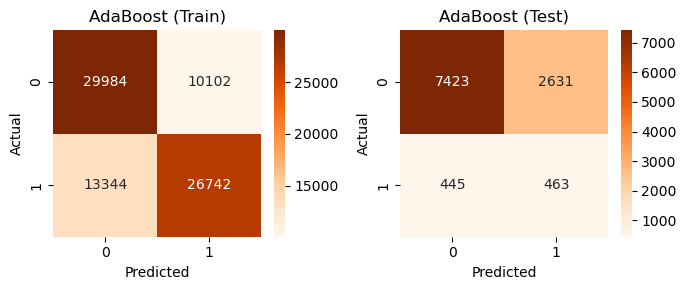

In [69]:
# ADABOOST CLASSIFIER

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=10),
    n_estimators=50,
    random_state=10
)
ada.fit(X_train_smote_dt, y_train_smote_dt)

# Predictions
y_pred_train_ada = ada.predict(X_train_smote_dt)
y_pred_test_ada  = ada.predict(X_test_dt)

# Accuracy
print("\n--- AdaBoost Classifier ---")
print("Train Accuracy:", accuracy_score(y_train_smote_dt, y_pred_train_ada))
print("Test Accuracy :", accuracy_score(y_test_dt, y_pred_test_ada))
print("OOB Score     : Not available for AdaBoost")


# Confusion Matrices (Train vs Test)
fig, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(confusion_matrix(y_train_smote_dt, y_pred_train_ada), annot=True, fmt="d", cmap="Oranges", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_dt, y_pred_test_ada), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()